In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pyspark.sql.functions as F
from pyspark.sql.functions import col, sum
import warnings
warnings.filterwarnings('ignore')

/Users/shubhamsingh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('crime_analysis').getOrCreate()

df = spark.read.csv('Chicago_Crimes_2012_to_2017.csv', header=True, inferSchema=True)

23/05/17 16:00:54 WARN Utils: Your hostname, Shubhams-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.250.194.248 instead (on interface en0)
23/05/17 16:00:54 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/05/17 16:00:55 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
print((df.count(), len(df.columns)))

(1456714, 23)


In [4]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: double (nullable = true)
 |-- Ward: double (nullable = true)
 |-- Community Area: double (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: double (nullable = true)
 |-- Y Coordinate: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [5]:
data_head = df.limit(5)
data_head.show()

23/05/16 18:18:38 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: _c0, ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
Expected: _c0 but found: 
CSV file: file:///Users/shubhamsingh/Downloads/Chicago_Crimes_2012_to_2017.csv
+---+--------+-----------+--------------------+-------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|_c0|      ID|Case Number|           

# Distinct crimes in Chicago

In [6]:
unique_crimes = df.select('Primary Type').distinct().collect()
for row in unique_crimes:
    print(row[0])

OFFENSE INVOLVING CHILDREN
STALKING
PUBLIC PEACE VIOLATION
OBSCENITY
ARSON
GAMBLING
CRIMINAL TRESPASS
ASSAULT
NON - CRIMINAL
LIQUOR LAW VIOLATION
MOTOR VEHICLE THEFT
THEFT
BATTERY
ROBBERY
HOMICIDE
PUBLIC INDECENCY
CRIM SEXUAL ASSAULT
HUMAN TRAFFICKING
INTIMIDATION
PROSTITUTION
DECEPTIVE PRACTICE
CONCEALED CARRY LICENSE VIOLATION
SEX OFFENSE
CRIMINAL DAMAGE
NARCOTICS
NON-CRIMINAL
OTHER OFFENSE
KIDNAPPING
BURGLARY
WEAPONS VIOLATION
OTHER NARCOTIC VIOLATION
INTERFERENCE WITH PUBLIC OFFICER
NON-CRIMINAL (SUBJECT SPECIFIED)


23/05/16 18:19:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: _c0, ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
Expected: _c0 but found: 
CSV file: file:///Users/shubhamsingh/Downloads/Chicago_Crimes_2012_to_2017.csv


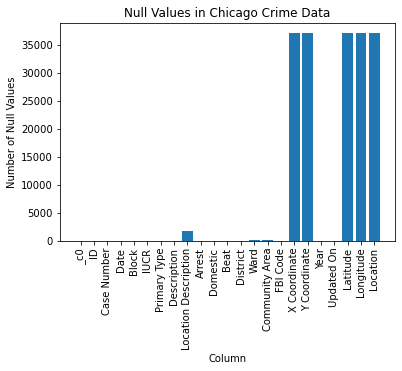

In [8]:
# count the number of null values in each column
null_counts = df.agg(*[F.count(F.when(F.isnull(c), c)).alias(c) for c in df.columns])

# convert to pandas dataframe for plotting
null_counts_pd = null_counts.toPandas()

# plot the null counts
plt.bar(null_counts_pd.columns, null_counts_pd.iloc[0])
plt.xticks(rotation=90)
plt.xlabel('Column')
plt.ylabel('Number of Null Values')
plt.title('Null Values in Chicago Crime Data')
plt.show()

In [9]:
df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in df.columns)).show()

23/05/16 18:19:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: _c0, ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
Expected: _c0 but found: 
CSV file: file:///Users/shubhamsingh/Downloads/Chicago_Crimes_2012_to_2017.csv


+---+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
|_c0| ID|Case Number|Date|Block|IUCR|Primary Type|Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On|Latitude|Longitude|Location|
+---+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
|  0|  0|          1|   0|    0|   0|           0|          0|                1658|     0|       0|   0|       1|  14|            40|       0|       37083|       37083|   0|         0|   37083|    37083|   37083|
+---+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------

# drop null values

In [10]:
# Count the number of rows before dropping null values
count_before = df.count()

# Drop null values
df = df.na.drop()

# Count the number of rows after dropping null values
count_after = df.count()

# Calculate the percentage of retained data
retained_percentage = (count_after / count_before) * 100

# Print the results
print(f"Rows before dropping null values: {count_before}")
print(f"Rows after dropping null values: {count_after}")
print(f"Retained data percentage: {retained_percentage}%")

23/05/16 18:19:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: _c0, ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
Expected: _c0 but found: 
CSV file: file:///Users/shubhamsingh/Downloads/Chicago_Crimes_2012_to_2017.csv


Rows before dropping null values: 1456714
Rows after dropping null values: 1418365
Retained data percentage: 97.36743108118684%


In [11]:
df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in df.columns)).show()

23/05/16 18:19:27 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: _c0, ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
Expected: _c0 but found: 
CSV file: file:///Users/shubhamsingh/Downloads/Chicago_Crimes_2012_to_2017.csv


+---+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
|_c0| ID|Case Number|Date|Block|IUCR|Primary Type|Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On|Latitude|Longitude|Location|
+---+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
|  0|  0|          0|   0|    0|   0|           0|          0|                   0|     0|       0|   0|       0|   0|             0|       0|           0|           0|   0|         0|       0|        0|       0|
+---+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------

## check for categorical columns

In [12]:
from pyspark.sql.types import StringType
# Initialize an empty list to store categorical column names
categorical_columns = []

# Iterate over the columns
for column in df.columns:
    # Check if the column data type is string
    if df.schema[column].dataType == StringType():
        categorical_columns.append(column)

# Print the categorical column names in one line
print("Categorical columns:", ", ".join(categorical_columns))

Categorical columns: Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, FBI Code, Updated On, Location


# Top 5 crimes in Chicago

23/05/16 18:19:33 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: _c0, ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
Expected: _c0 but found: 
CSV file: file:///Users/shubhamsingh/Downloads/Chicago_Crimes_2012_to_2017.csv


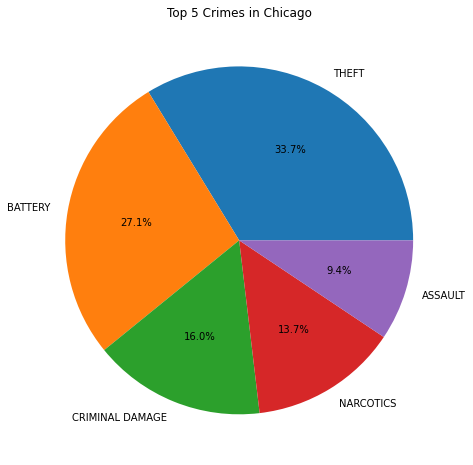

In [13]:
# Group the data by "Primary Type" and count the occurrences
crime_counts = df.groupBy("Primary Type").count()

# Sort the crime counts in descending order
sorted_crime_counts = crime_counts.orderBy("count", ascending=False)

# Select the top 5 crimes
top_5_crimes = sorted_crime_counts.limit(5).toPandas()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_crimes["count"], labels=top_5_crimes["Primary Type"], autopct='%1.1f%%')
plt.title("Top 5 Crimes in Chicago")
plt.show()

23/05/16 18:19:37 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: _c0, ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
Expected: _c0 but found: 
CSV file: file:///Users/shubhamsingh/Downloads/Chicago_Crimes_2012_to_2017.csv


23/05/16 18:19:39 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: _c0, ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
Expected: _c0 but found: 
CSV file: file:///Users/shubhamsingh/Downloads/Chicago_Crimes_2012_to_2017.csv


23/05/16 18:19:41 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: _c0, ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
Expected: _c0 but found: 
CSV file: file:///Users/shubhamsingh/Downloads/Chicago_Crimes_2012_to_2017.csv


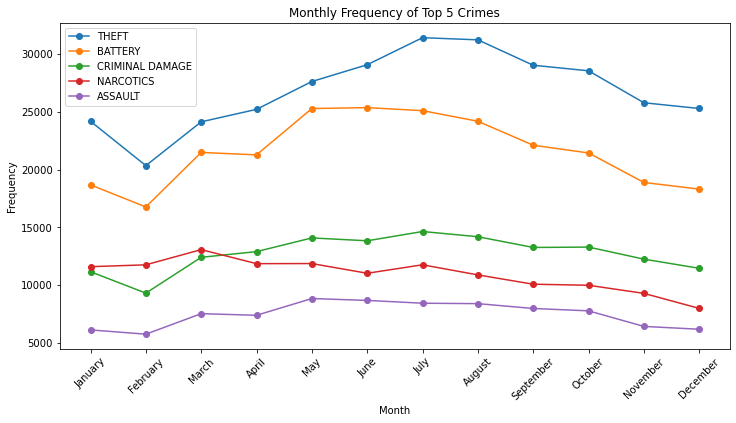

In [14]:
from pyspark.sql.functions import month, desc

# Convert the "Date" column to timestamp type
df = df.withColumn('Date', F.to_timestamp('Date', 'MM/dd/yyyy hh:mm:ss a'))

# Filter the DataFrame for the top 5 crimes
top_crimes = df.filter(df['Primary Type'].isin(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT']))

# Extract month from the date
top_crimes = top_crimes.withColumn('Month', month('Date'))

# Group by month and "Primary Type" and count the occurrences
monthly_counts = top_crimes.groupBy('Month', 'Primary Type').count()

# Calculate the total count of each crime type across all months
total_counts = monthly_counts.groupBy('Primary Type').agg(F.sum('count').alias('Total'))

# Sort the crimes based on the total count in descending order
sorted_crimes = total_counts.orderBy(desc('Total')).select('Primary Type').collect()

# Extract the crime types in the sorted order
sorted_crime_types = [row['Primary Type'] for row in sorted_crimes]

# Pivot the DataFrame to have "Primary Type" as columns
pivoted_counts = monthly_counts.groupBy('Month').pivot('Primary Type')\
.sum('count').fillna(0)

# Convert the DataFrame to Pandas for plotting
pivoted_pd = pivoted_counts.toPandas()

# Create a dictionary to map month number to month name
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Map the month numbers to month names in the DataFrame and sort by month number
pivoted_pd['Month'] = pivoted_pd['Month'].map(month_names)
pivoted_pd['Month'] = pd.Categorical(pivoted_pd['Month'], month_names.values())
pivoted_pd = pivoted_pd.sort_values('Month')

# Plot the line graph
plt.figure(figsize=(12, 6))
for column in sorted_crime_types:
    plt.plot(pivoted_pd['Month'], pivoted_pd[column], marker='o', label=column)

plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Monthly Frequency of Top 5 Crimes')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Aressts in Chicago

23/05/16 18:19:46 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: _c0, ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
Expected: _c0 but found: 
CSV file: file:///Users/shubhamsingh/Downloads/Chicago_Crimes_2012_to_2017.csv


23/05/16 18:19:48 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: _c0, ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
Expected: _c0 but found: 
CSV file: file:///Users/shubhamsingh/Downloads/Chicago_Crimes_2012_to_2017.csv


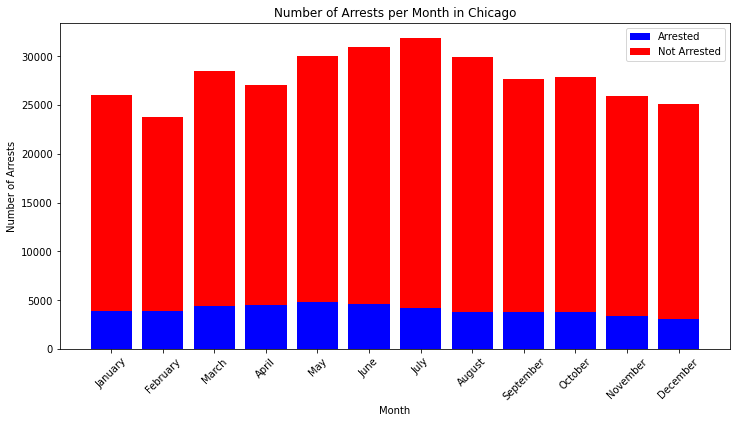

In [15]:
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
from pyspark.sql.functions import month, year
import pandas as pd

# Extract month and year from the date
df = df.withColumn('Month', month('Date'))
df = df.withColumn('Year', year('Date'))

# Group by year, month, and Arrest column, and count the number of occurrences
monthly_arrests = df.groupBy('Year', 'Month', 'Arrest').count()

# Sort the data by year and month
sorted_arrests = monthly_arrests.orderBy('Year', 'Month')

# Aggregate the data at the year and month level
aggregated_arrests = sorted_arrests.groupBy('Year', 'Month').pivot('Arrest').sum('count')

# Collect the data as a list of Row objects
arrests_rows = aggregated_arrests.collect()

# Convert the data to a Pandas DataFrame manually
arrests_data = [(row['Year'], row['Month'], row['true'], row['false']) for row in arrests_rows]
arrests_pd = pd.DataFrame(arrests_data, columns=['Year', 'Month', 'Arrested', 'Not Arrested'])

# Create a dictionary to map month number to month name
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Map the month numbers to month names in the DataFrame and sort by month number
arrests_pd['Month'] = arrests_pd['Month'].map(month_names)
arrests_pd['Month'] = pd.Categorical(arrests_pd['Month'], month_names.values())
arrests_pd = arrests_pd.sort_values('Month')

# Plot the stacked bar graph with different color palette for each category
plt.figure(figsize=(12, 6))
plt.bar(arrests_pd['Month'], arrests_pd['Arrested'], label='Arrested', color='blue')
plt.bar(arrests_pd['Month'], arrests_pd['Not Arrested'], bottom=arrests_pd['Arrested'], label='Not Arrested', color='red')

plt.xlabel('Month')
plt.ylabel('Number of Arrests')
plt.title('Number of Arrests per Month in Chicago')
plt.xticks(rotation=45)
plt.legend()
plt.show()

23/05/16 18:19:51 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: _c0, ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
Expected: _c0 but found: 
CSV file: file:///Users/shubhamsingh/Downloads/Chicago_Crimes_2012_to_2017.csv


23/05/16 18:19:52 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: _c0, ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
Expected: _c0 but found: 
CSV file: file:///Users/shubhamsingh/Downloads/Chicago_Crimes_2012_to_2017.csv


23/05/16 18:19:54 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: _c0, ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
Expected: _c0 but found: 
CSV file: file:///Users/shubhamsingh/Downloads/Chicago_Crimes_2012_to_2017.csv


<Figure size 1008x576 with 0 Axes>

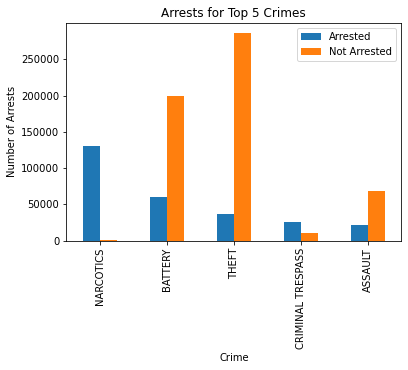

In [16]:
import pyspark.sql.functions as F
import matplotlib.pyplot as plt

# Group by Primary Type and Arrest column, and count the number of occurrences
top_crimes = df.groupBy('Primary Type', 'Arrest').count()

# Filter for the top 5 crimes based on the highest count of arrests
top_5_crimes = top_crimes.filter(F.col('Arrest') == 'true') \
                         .orderBy(F.desc('count')) \
                         .limit(5)

# Extract the top 5 crime names
crime_names = [row['Primary Type'] for row in top_5_crimes.collect()]

# Filter the data for the top 5 crimes and group by Primary Type and Arrest column
arrests = df.filter(df['Primary Type'].isin(crime_names)) \
            .groupBy('Primary Type', 'Arrest').count()

# Pivot the data to convert Arrest column into columns
arrests_pivot = arrests.groupBy('Primary Type').pivot('Arrest').sum('count').fillna(0)

# Prepare the data for plotting
arrests_data = arrests_pivot.toPandas().set_index('Primary Type')
arrests_data = arrests_data.reindex(columns=['true', 'false'])

# Sort the data in descending order
arrests_data = arrests_data.sort_values(by='true', ascending=False)

# Increase the figure size
plt.figure(figsize=(14, 8))

# Plot the presence or absence of arrests for the top 5 crimes
arrests_data.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'])

plt.xlabel('Crime')
plt.ylabel('Number of Arrests')
plt.title('Arrests for Top 5 Crimes')

plt.legend(['Arrested', 'Not Arrested'])

plt.show()

# Crime time in Chicago

23/05/16 18:20:02 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: _c0, ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
Expected: _c0 but found: 
CSV file: file:///Users/shubhamsingh/Downloads/Chicago_Crimes_2012_to_2017.csv


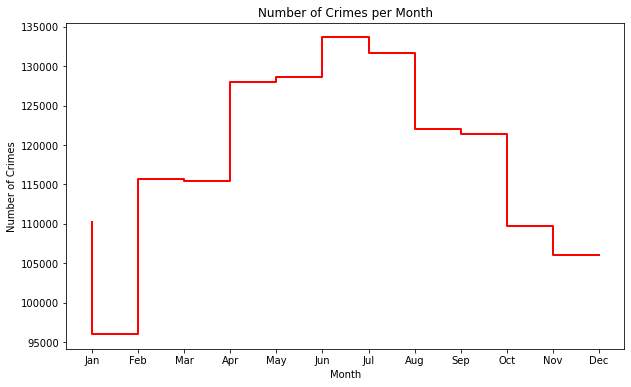

In [18]:
# Group by month and count the number of crimes
crimes_per_month = df.groupBy(F.month('Date').alias('Month')).count()

# Convert the data to pandas dataframe
crimes_per_month_pd = crimes_per_month.toPandas()

# Sort the data by month
crimes_per_month_pd['Month'] = crimes_per_month_pd['Month'].apply(lambda x: calendar.month_abbr[x])
crimes_per_month_pd['Month'] = pd.Categorical(crimes_per_month_pd['Month'], categories=calendar.month_abbr[1:], ordered=True)
crimes_per_month_pd = crimes_per_month_pd.sort_values('Month')

# Create a step plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.step(crimes_per_month_pd['Month'], crimes_per_month_pd['count'], color='red', linewidth=2)

plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes per Month')

plt.show()

# Unsafe hours in Chicago

23/05/16 18:20:08 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: _c0, ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
Expected: _c0 but found: 
CSV file: file:///Users/shubhamsingh/Downloads/Chicago_Crimes_2012_to_2017.csv


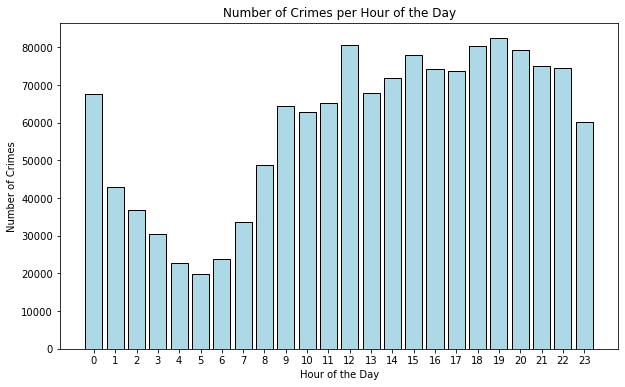

In [19]:
# Group by hour and count the number of crimes
crimes_per_hour = df.groupBy(F.hour('Date').alias('Hour')).count()

# Convert the data to pandas dataframe
crimes_per_hour_pd = crimes_per_hour.toPandas()

# Create a color palette
color = 'lightblue'

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(crimes_per_hour_pd['Hour'], crimes_per_hour_pd['count'], color=color, edgecolor='black')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes per Hour of the Day')

# Set the x-axis ticks and labels for every hour
hours = range(24)
ax.set_xticks(hours)
ax.set_xticklabels([str(h) for h in hours])

plt.show()

# Theft over 24 hours

23/05/16 18:35:06 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: _c0, ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
Expected: _c0 but found: 
CSV file: file:///Users/shubhamsingh/Downloads/Chicago_Crimes_2012_to_2017.csv


findfont: Font family ['Agency FB'] not found. Falling back to DejaVu Sans.     


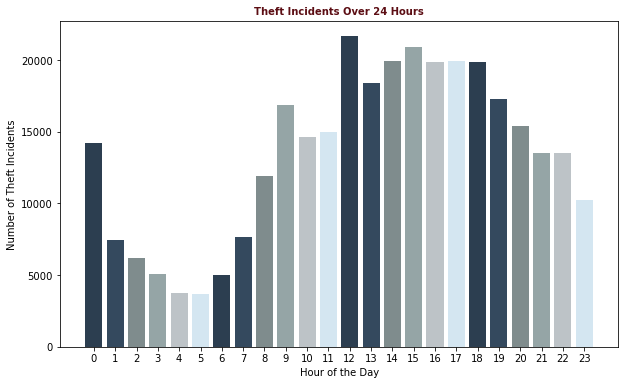

In [31]:
import numpy as np

# Filter the dataframe for theft incidents
theft_df = df.filter(df['Primary Type'] == 'THEFT')

# Extract the hour from the Date column
theft_df = theft_df.withColumn('Hour', F.hour('Date'))

# Group by hour and count the number of theft incidents
theft_by_hour = theft_df.groupBy('Hour').count()

# Convert the data to pandas dataframe
theft_by_hour_pd = theft_by_hour.toPandas()

# Sort the data by hour
theft_by_hour_pd = theft_by_hour_pd.sort_values('Hour')

# Define colors for the bars
colors = ['#2C3E50', '#34495E', '#7F8C8D', '#95A5A6', '#BDC3C7', '#D4E6F1']

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(theft_by_hour_pd['Hour'], theft_by_hour_pd['count'], color=colors)

# Set the x-axis tick labels to display every hour
ax.set_xticks(theft_by_hour_pd['Hour'])

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Theft Incidents')
plt.title('Theft Incidents Over 24 Hours', fontdict={'fontsize': 10, 'color': '#5C0E14', 'fontname': 'Agency FB'}, weight='bold')

plt.show()

# Top 5 crimes based of districts (need to change the color code)

23/05/16 18:41:39 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: _c0, ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
Expected: _c0 but found: 
CSV file: file:///Users/shubhamsingh/Downloads/Chicago_Crimes_2012_to_2017.csv


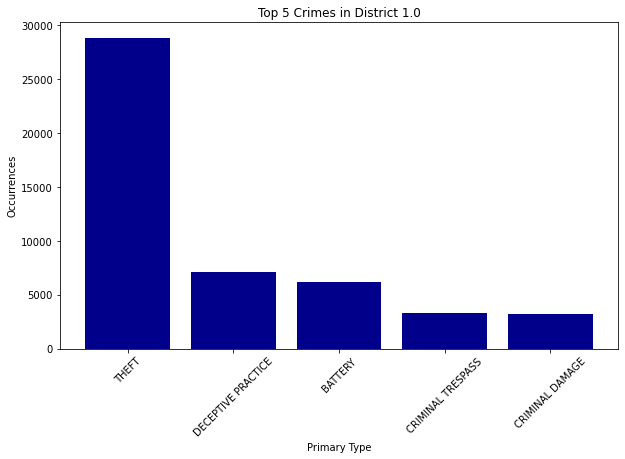

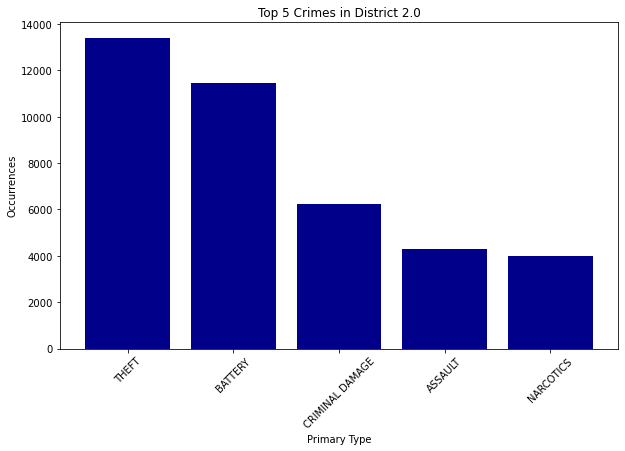

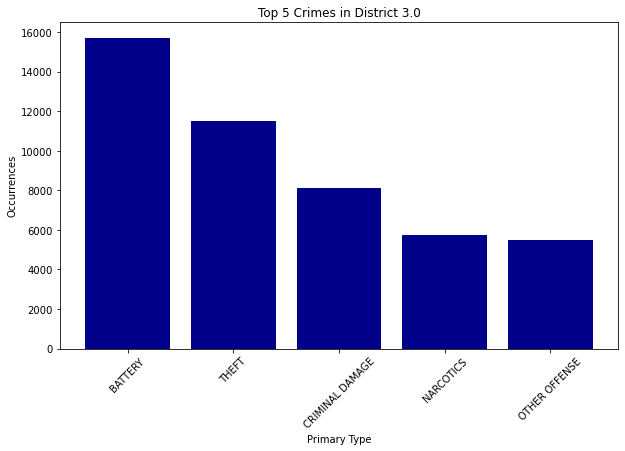

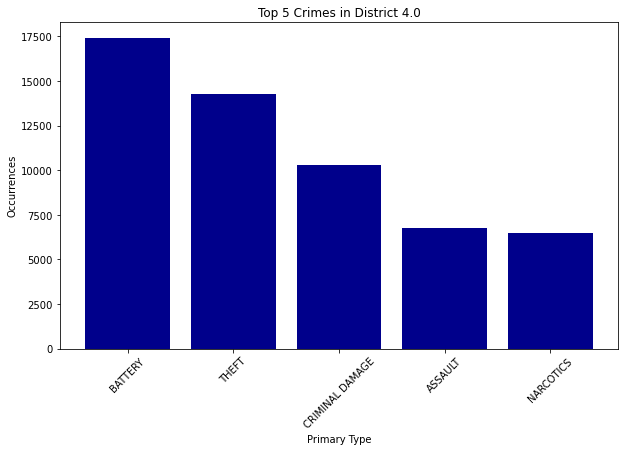

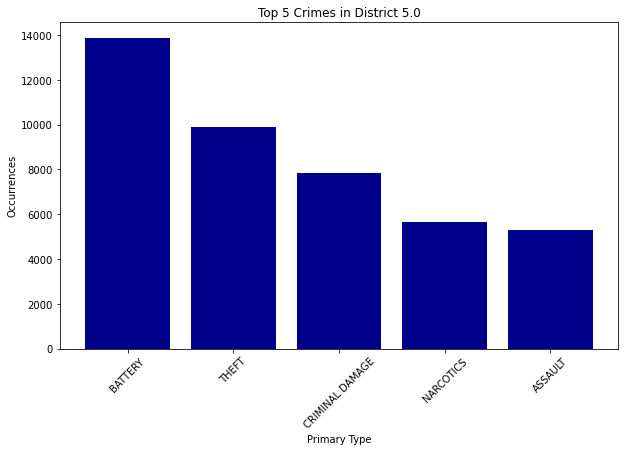

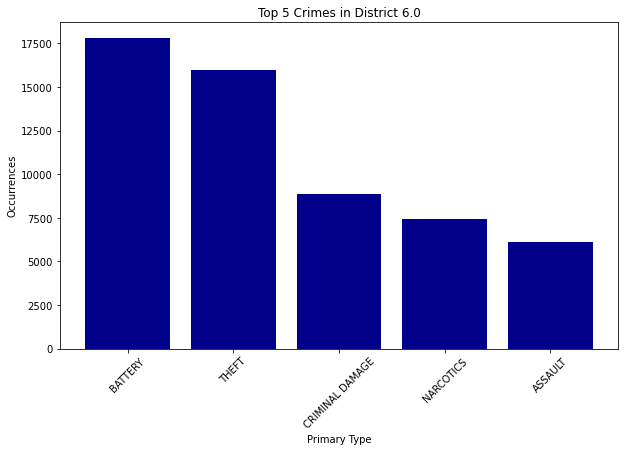

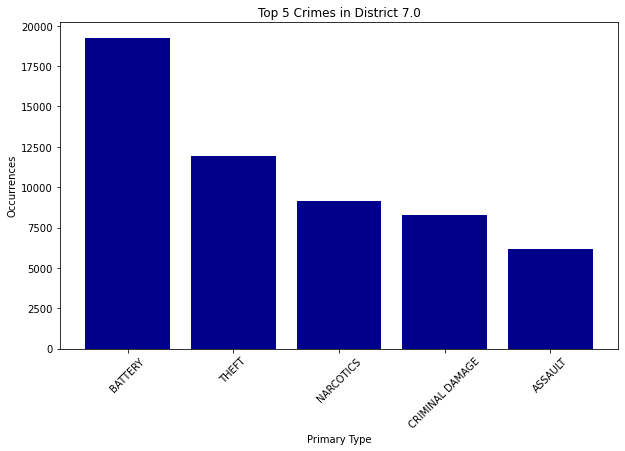

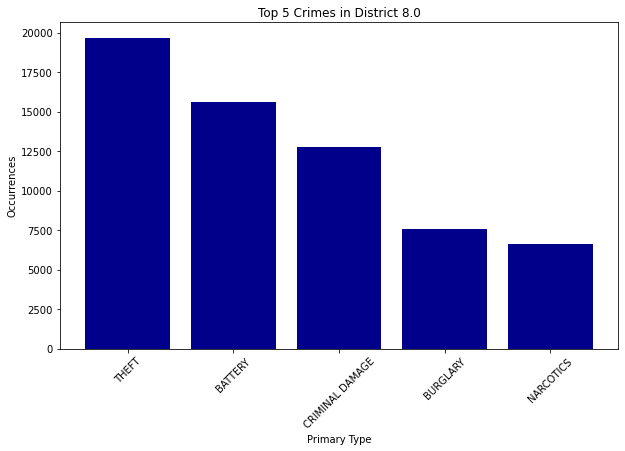

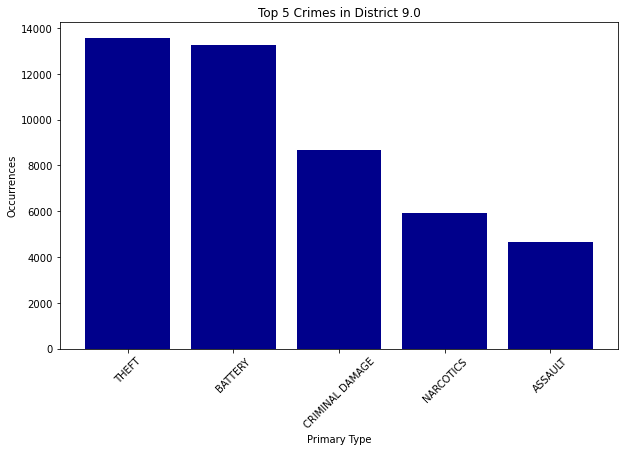

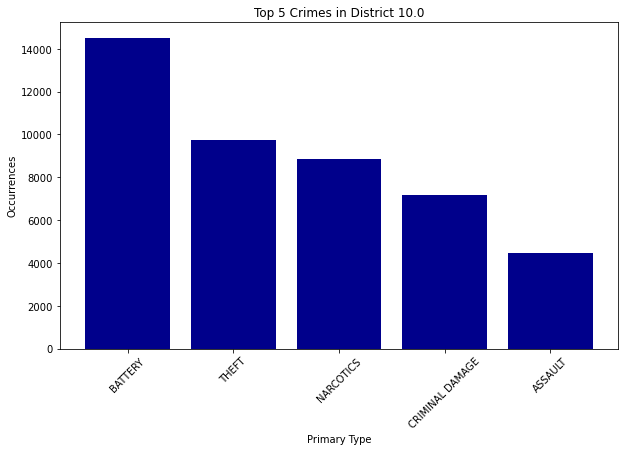

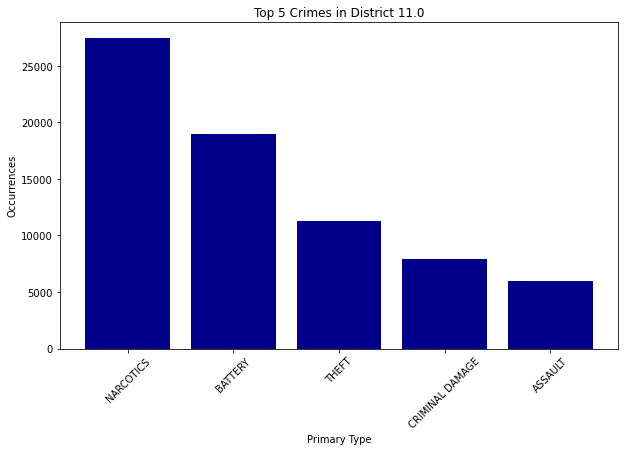

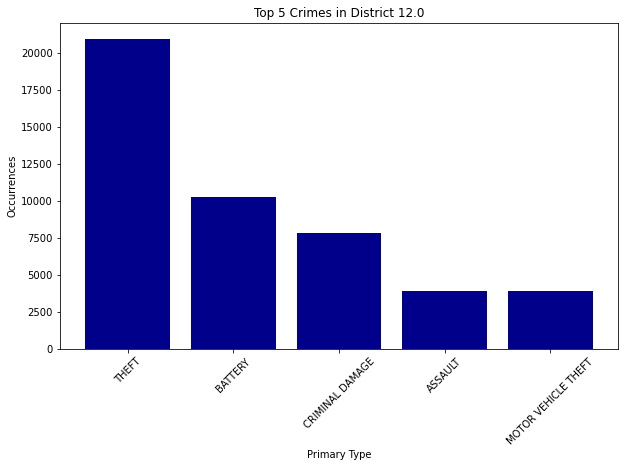

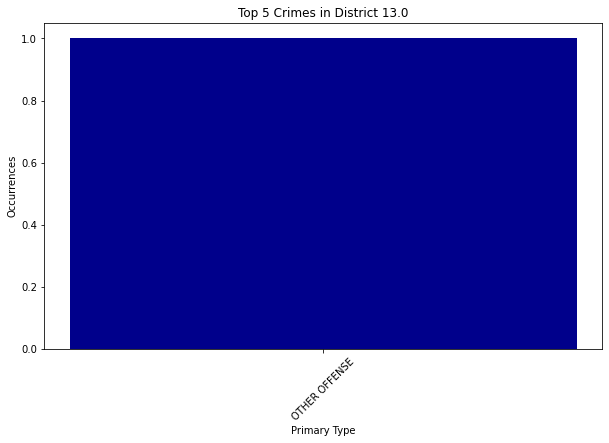

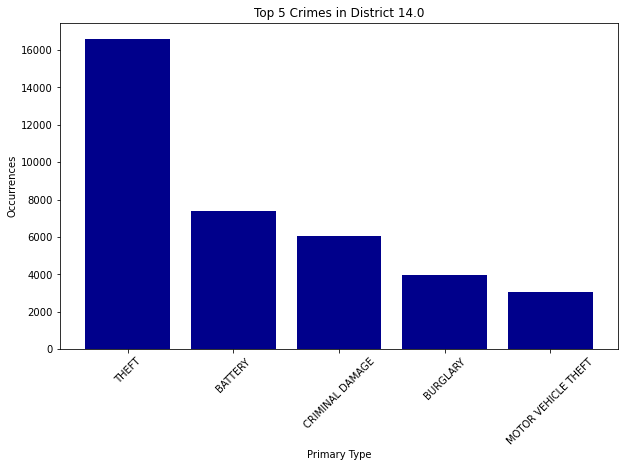

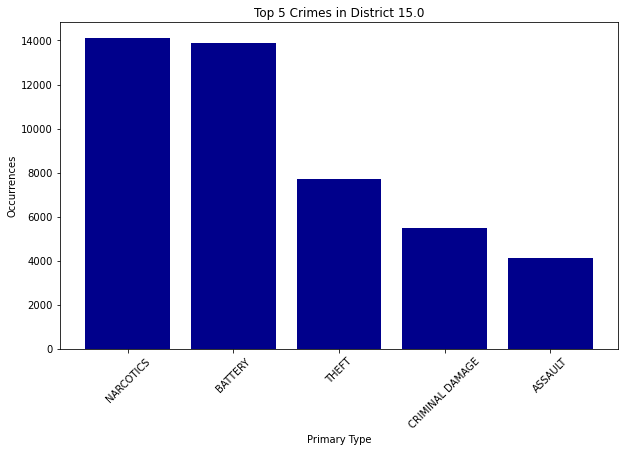

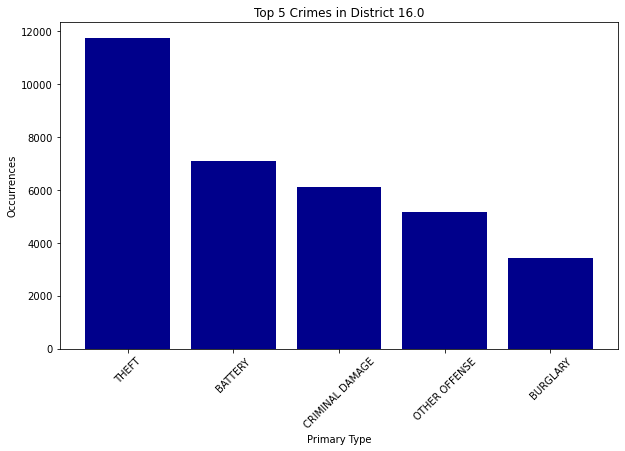

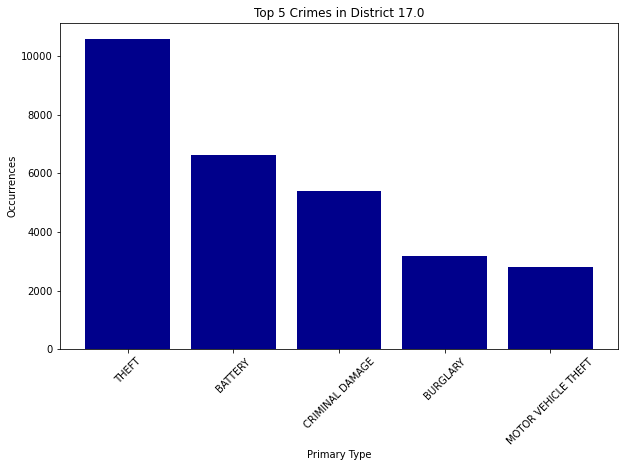

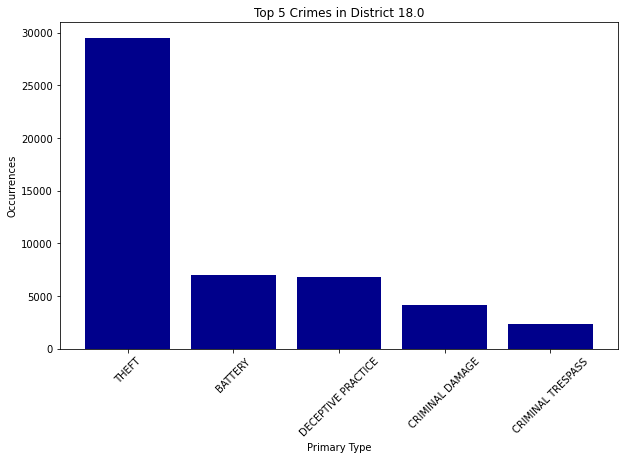

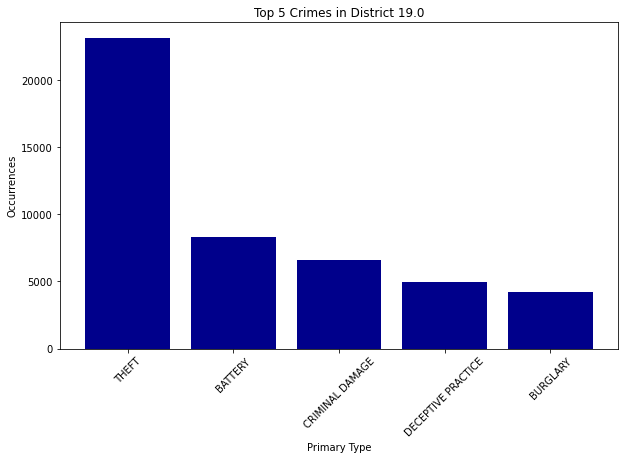

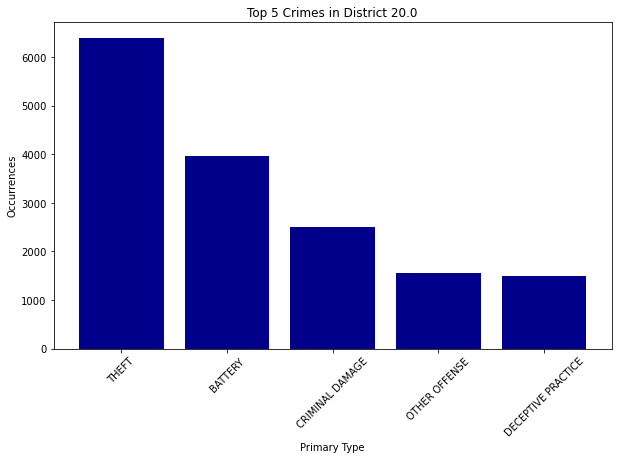

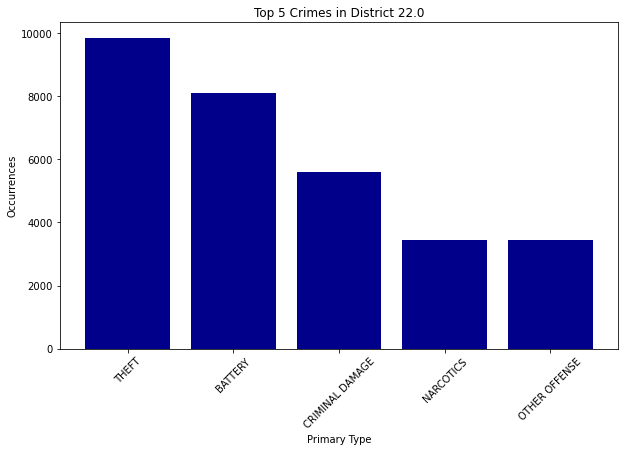

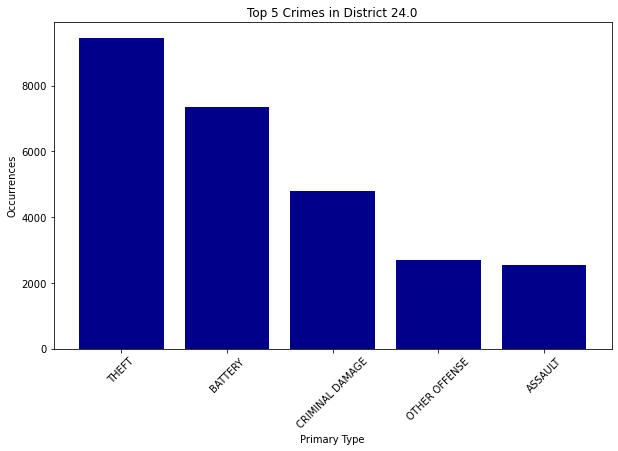

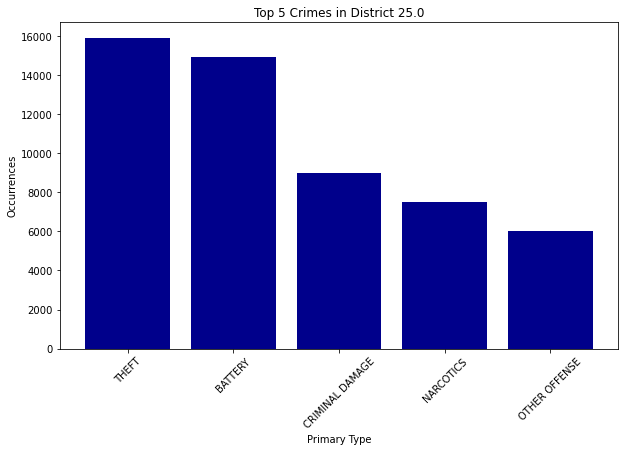

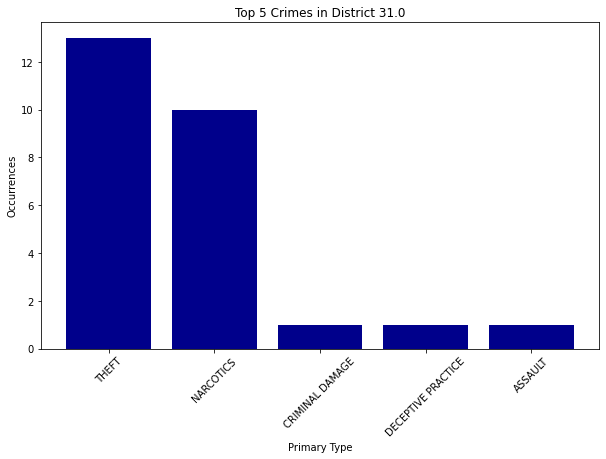

In [36]:
import matplotlib.pyplot as plt

# Group the data by district and primary type to count occurrences
grouped_df = df.groupBy('District', 'Primary Type').count()

# Sort the data within each district to get the top 5 crime types
sorted_df = grouped_df.withColumn('Rank', F.row_number().over(Window.partitionBy('District').orderBy(F.desc('count'))))
top5_df = sorted_df.filter(F.col('Rank') <= 5)

# Convert the data to pandas dataframe for plotting
top5_pd = top5_df.toPandas()

# Create a separate graph for each district
districts = top5_pd['District'].unique()
for district in districts:
    district_data = top5_pd[top5_pd['District'] == district]
    plt.figure(figsize=(10, 6))
    plt.bar(district_data['Primary Type'], district_data['count'], color='darkblue')
    plt.xlabel('Primary Type')
    plt.ylabel('Occurrences')
    plt.title(f'Top 5 Crimes in District {district}')
    plt.xticks(rotation=45)
    plt.show()

# Top 15 crimes

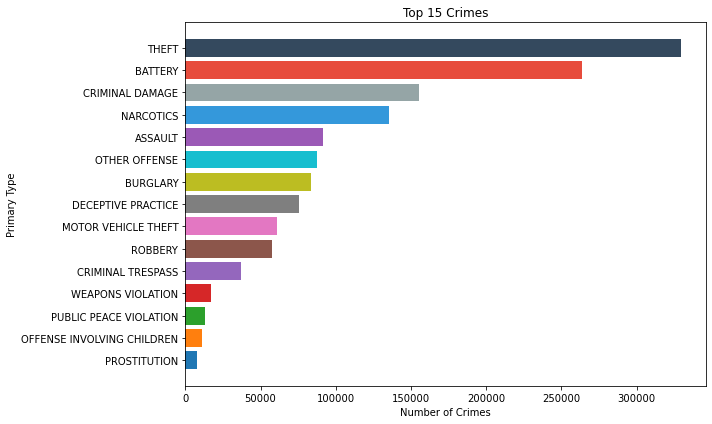

In [5]:
# Group by primary type and count the number of crimes
crime_counts = df.groupBy('Primary Type').count()

# Sort the data by count in descending order and select the top 15 crimes
top_15_crimes = crime_counts.orderBy('count', ascending=False).limit(15)

# Convert the data to pandas dataframe
top_15_crimes_pd = top_15_crimes.toPandas()

# Sort the data by count in ascending order for horizontal bar plotting
top_15_crimes_pd.sort_values('count', ascending=True, inplace=True)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
          '#7f7f7f', '#bcbd22', '#17becf', '#9b59b6', '#3498db', '#95a5a6', '#e74c3c', '#34495e']
ax.barh(top_15_crimes_pd['Primary Type'], top_15_crimes_pd['count'], color=colors)

plt.xlabel('Number of Crimes')
plt.ylabel('Primary Type')
plt.title('Top 15 Crimes')

plt.tight_layout()
plt.show()

## Places where crime occurs

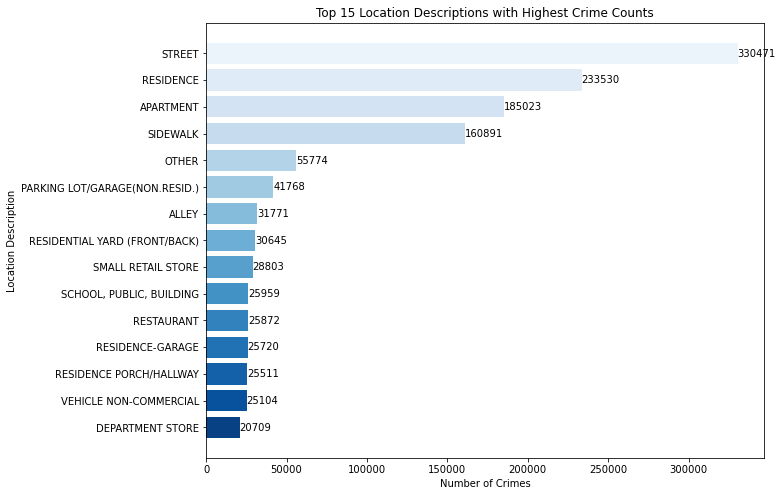

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by location description and count the number of crimes
location_counts = df.groupBy('Location Description').count()

# Sort the locations by count in descending order and select the top 15
top_locations = location_counts.orderBy('count', ascending=False).limit(15)

# Convert the data to pandas dataframe
top_locations_pd = top_locations.toPandas()

# Sort the locations by count in ascending order for horizontal bar plot
top_locations_pd = top_locations_pd.sort_values('count', ascending=True)

# Create a horizontal bar plot with color
fig, ax = plt.subplots(figsize=(10, 8))
colors = sns.color_palette('Blues_r', len(top_locations_pd))
bars = ax.barh(top_locations_pd['Location Description'], top_locations_pd['count'], color=colors)

# Customize the plot
plt.xlabel('Number of Crimes')
plt.ylabel('Location Description')
plt.title('Top 15 Location Descriptions with Highest Crime Counts')

# Add value labels to the bars
for bar in bars:
    value = bar.get_width()
    ax.text(value, bar.get_y() + bar.get_height() / 2, str(value), ha='left', va='center', color='black')

plt.show()

# Drop irrelevant columns

In [ ]:
# Drop the specified columns
columns_to_drop = ['_c0', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Updated On',
                   'Year', 'FBI Code', 'Beat', 'Ward', 'Community Area', 'Latitude', 'Longitude']
df = df.drop(*columns_to_drop)

In [ ]:
df.printSchema()